# SNLI Dataset Analysis
- This notebook manipulates preprocessed files instead of original dataset
    - See filter_data.py

In [5]:
import pandas as pd

train_path = '.data/snli-1.0-formatted-train.csv'
train_df = pd.read_csv(train_path, sep='\t')
display(train_df.dtypes)
train_df[:5]

premise       object
hypothesis    object
label         object
dtype: object

,premise,hypothesis,label
0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,neutral
1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",contradiction
2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",entailment
3,Children smiling and waving at camera,They are smiling at their parents,neutral
4,Children smiling and waving at camera,There are children present,entailment


- Describe statistics about labels

,label
,count
label,
contradiction,183187
entailment,183416
neutral,182764


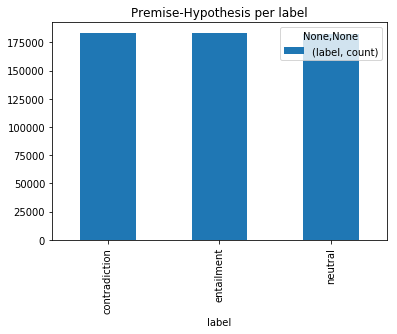

In [6]:
grouped_df = train_df.groupby(['label']).agg({'label': ['count']})
display(grouped_df)
grouped_df.plot(kind='bar', title='Premise-Hypothesis per label')






# Sentence Length Analysis
- This analysis shows an aproximated max_len that we can use in a neural network

In [7]:
train_df['premise'] =  train_df['premise'].astype(str)
train_df['p_length'] = train_df['premise'].apply(lambda row: len(row.split()))
train_df['hypothesis'] =  train_df['hypothesis'].astype(str)
train_df['h_length'] = train_df['hypothesis'].apply(lambda row: len(row.split()))
train_df[:5]

,premise,hypothesis,label,p_length,h_length
0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,neutral,11,9
1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",contradiction,11,9
2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",entailment,11,7
3,Children smiling and waving at camera,They are smiling at their parents,neutral,6,6
4,Children smiling and waving at camera,There are children present,entailment,6,4


,p_length,h_length
count,549367.000000,549367.000000
mean,12.849376,7.415748
std,5.656857,3.067807
min,2.000000,1.000000
25%,9.000000,5.000000
50%,12.000000,7.000000
75%,16.000000,9.000000
99.9%,44.000000,24.000000
max,78.000000,56.000000


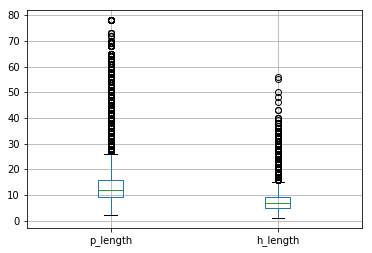

In [42]:
len_df = train_df[['p_length', 'h_length']]
display(len_df.describe(percentiles=[.25, .5, .75, .999]))
display(len_df.boxplot())



# Byte Pair Encoding
- Create a file with all of sentences contained in SNLI to train a *Byte-Pair Encoding*

In [ ]:
premises = train_df['premise']
premises.column = ['text']
hypothesis = train_df['hypothesis']
hypothesis.column = ['text']
texts = pd.concat([premises, hypothesis])
display('Number of sentences: {}'.format(len(texts)))
texts.to_csv(r'.data/snli_sentences.txt', header=None, index=None)

- Serialize the train/vat/test sets into a compact format

In [1]:
val_path = '.data/snli_1.0/snli_1.0_val.jsonl'
test_path = '.data/snli_1.0/snli_1.0_test.jsonl'
val_df = pd.read_json(val_path, lines=True)
val_df = filter_df(val_df)
test_df = pd.read_json(val_path, lines=True)
test_df = filter_df(test_df)

NameError: name 'pd' is not defined